In [1]:
 #Importing Libraries
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
print('Libraries Imported')

Libraries Imported


In [3]:
#df = pd.read_excel('data/input/Drastic-Model-Data-For-ML-Analysis.xlsx', header=0)

In [5]:
#df.to_csv('data/input/Drastic-Model-Data-For-ML-Analysis.csv', index=False)

In [2]:
df = pd.read_csv('data/input/Drastic-Model-Data-For-ML-Analysis.csv')

In [3]:
df.head()

,OBJECTID *,pointid,grid_code,Vulnerabil,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media
0,1,3254,2,Low (47-78),<Null>,6,1,3,1,5,1
1,2,3255,3,Medium (78-100),3,4,1,3,1,5,1
2,3,3256,3,Medium (78-100),3,4,1,3,1,5,1
3,4,3257,3,Medium (78-100),1,4,1,3,1,5,1
4,5,3258,3,Medium (78-100),2,4,1,3,1,5,1


In [4]:
df.dtypes

OBJECTID *                int64
pointid                   int64
grid_code                 int64
Vulnerabil               object
Tropograpy               object
Soil__Media              object
Net_Recharge             object
Impact_Vandose_Zone       int64
Hydrolic_Conductivity     int64
Depth_to_Acquifer         int64
Aquirfer_Media            int64
dtype: object

In [5]:
df = df.drop(['OBJECTID *', 'Vulnerabil'], axis=1) # remove unnecessary columns

In [6]:
df.head()

,pointid,grid_code,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media
0,3254,2,<Null>,6,1,3,1,5,1
1,3255,3,3,4,1,3,1,5,1
2,3256,3,3,4,1,3,1,5,1
3,3257,3,1,4,1,3,1,5,1
4,3258,3,2,4,1,3,1,5,1


## Understanding Class Imbalance in Multiclass Datasets

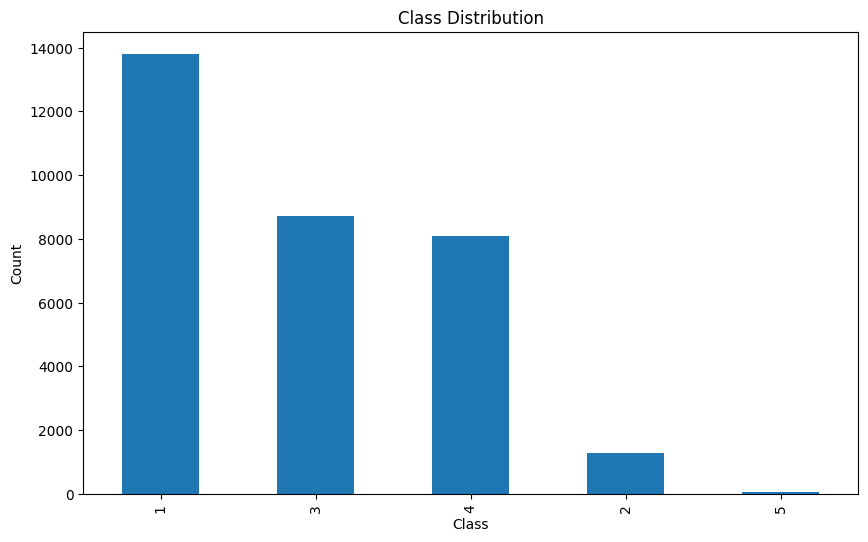

grid_code
1    13804
3     8706
4     8085
2     1271
5       52
Name: count, dtype: int64
grid_code
1    0.432483
3    0.272761
4    0.253305
2    0.039821
5    0.001629
Name: count, dtype: float64


In [7]:
# Visualize class distribution
plt.figure(figsize=(10, 6))
df['grid_code'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Calculate class frequencies and ratios
class_counts = df['grid_code'].value_counts()
class_ratios = class_counts / class_counts.sum()

print(class_counts)
print(class_ratios)

### Replace `<Null>` with None

In [8]:
# <Null>
df1 = df.replace("<Null>", None)

In [9]:
# Check for missing values
print(df1.isnull().sum())  # Counts missing values per column
print(df1.info())  # Provides overall information

pointid                    0
grid_code                  0
Tropograpy               460
Soil__Media              159
Net_Recharge              54
Impact_Vandose_Zone        0
Hydrolic_Conductivity      0
Depth_to_Acquifer          0
Aquirfer_Media             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31918 entries, 0 to 31917
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   pointid                31918 non-null  int64 
 1   grid_code              31918 non-null  int64 
 2   Tropograpy             31458 non-null  object
 3   Soil__Media            31759 non-null  object
 4   Net_Recharge           31864 non-null  object
 5   Impact_Vandose_Zone    31918 non-null  int64 
 6   Hydrolic_Conductivity  31918 non-null  int64 
 7   Depth_to_Acquifer      31918 non-null  int64 
 8   Aquirfer_Media         31918 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 2.2+ MB
None


In [9]:
df1.head(3)

,pointid,grid_code,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media
0,3254,2,None,6,1,3,1,5,1
1,3255,3,3,4,1,3,1,5,1
2,3256,3,3,4,1,3,1,5,1


In [12]:
# df1[df1.apply(lambda x: x.Tropograpy == None and x.grid_code == 1, axis=1)][['grid_code', 'Tropograpy']].head()
df1[df1.apply(lambda x: x.Tropograpy == None and x.grid_code == 1, axis=1)][['grid_code']].count()

grid_code    86
dtype: int64

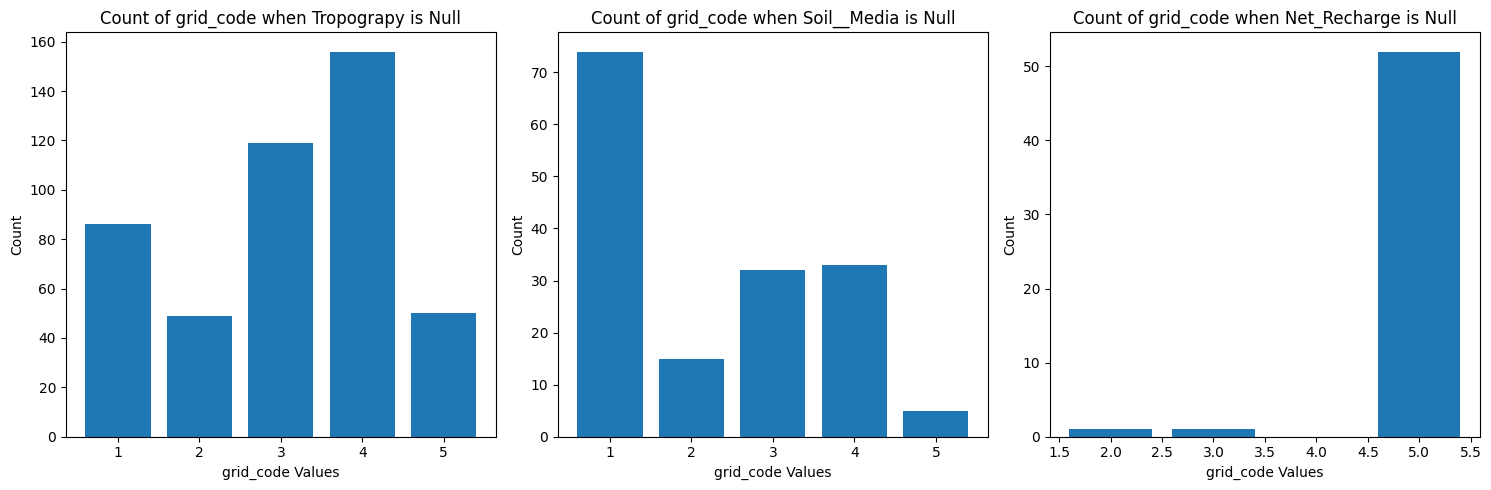

In [13]:
# Create a new figure for plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

NULL_VALUES_COLS = df1.columns[df1.isnull().any()] # get null columns
TARGET_COL = 'grid_code'

# Iterate over columns and create subplots
for i, col in enumerate(NULL_VALUES_COLS):
    counts = df1[df1[col].isna()][TARGET_COL].value_counts()
    axes[i].bar(counts.index, counts.values)
    axes[i].set_xlabel(f'{TARGET_COL} Values')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Count of {TARGET_COL} when {col} is Null')

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Display the plot
plt.show()

### Data Cleaning

##### '''As we have imbalanced dataset, so we will use Stratified K-Fold technique where we may use Grid Search / Randomized Search to 
##### optimize the underlying hyperparameters.'''

'''
##### And we know that - 
##### Oversampling: This technique involves increasing the number of instances in the minority class.
##### Hybrid Approaches: Combining oversampling and undersampling techniques can be effective in certain scenarios.   
##### Class Weighting: Assigning different weights to different classes can help balance the impact of class imbalance.   
##### Algorithm Selection: Choosing algorithms that are robust to class imbalance, such as decision trees or ensemble methods 
##### like Random Forest and XGBoost.
'''

In [14]:
df1.head()

,pointid,grid_code,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media
0,3254,2,None,6,1,3,1,5,1
1,3255,3,3,4,1,3,1,5,1
2,3256,3,3,4,1,3,1,5,1
3,3257,3,1,4,1,3,1,5,1
4,3258,3,2,4,1,3,1,5,1


#### Imputation (Filling None values with Central values (Mean/Median/Mode), here is the Mean as all are numerical data
#### Using KNN Imputation..

In [10]:
from sklearn.impute import KNNImputer

In [11]:
df = pd.DataFrame(df1)

# Initialize KNNImputer with a specified number of neighbors
imputer = KNNImputer(n_neighbors=2)

# Apply KNN imputation on the entire DataFrame
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("Original DataFrame:")
print(df1.head(3))
print("\nDataFrame after KNN Imputation:")
print(df_imputed.head(3))

Original DataFrame:
   pointid  grid_code Tropograpy Soil__Media Net_Recharge  \
0     3254          2       None           6            1   
1     3255          3          3           4            1   
2     3256          3          3           4            1   

   Impact_Vandose_Zone  Hydrolic_Conductivity  Depth_to_Acquifer  \
0                    3                      1                  5   
1                    3                      1                  5   
2                    3                      1                  5   

   Aquirfer_Media  
0               1  
1               1  
2               1  

DataFrame after KNN Imputation:
   pointid  grid_code  Tropograpy  Soil__Media  Net_Recharge  \
0   3254.0        2.0         3.0          6.0           1.0   
1   3255.0        3.0         3.0          4.0           1.0   
2   3256.0        3.0         3.0          4.0           1.0   

   Impact_Vandose_Zone  Hydrolic_Conductivity  Depth_to_Acquifer  \
0                  3.0  

In [12]:
df_imputed.describe()

,pointid,grid_code,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media
count,31918.000000,31918.000000,31918.000000,31918.000000,31918.000000,31918.000000,31918.000000,31918.000000,31918.000000
mean,15959.500000,2.351776,2.066624,3.168040,3.577339,2.720753,2.791215,3.054891,1.446958
std,9214.077282,1.268634,0.912546,1.756301,1.291732,0.789021,1.178903,1.591383,0.991199
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,7980.250000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,1.000000,1.000000
50%,15959.500000,3.000000,2.000000,4.000000,4.000000,3.000000,3.000000,3.000000,1.000000
75%,23938.750000,4.000000,3.000000,4.000000,5.000000,3.000000,4.000000,5.000000,1.000000
max,31918.000000,5.000000,5.000000,7.000000,5.000000,5.000000,5.000000,5.000000,5.000000


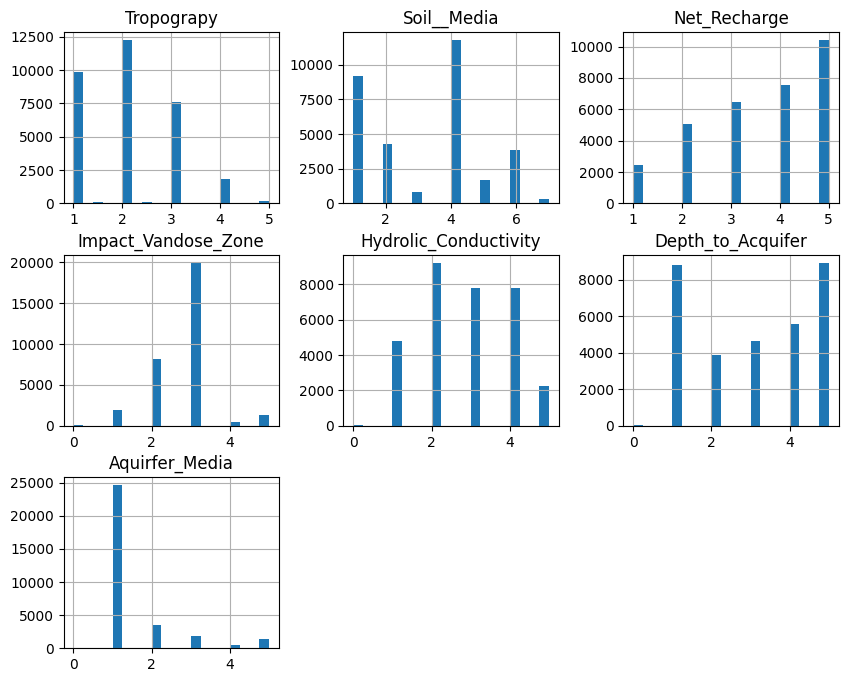

In [13]:
# Plot histogram for each feature
df_imputed.loc[:, ~df.columns.isin(['pointid', 'grid_code'])].hist(bins=20, figsize=(10, 8))
plt.show()

In [14]:
df_cleaned = df_imputed

In [15]:
df_cleaned['pointid'].nunique()

31918

In [16]:
df_cleaned.head()

,pointid,grid_code,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media
0,3254.0,2.0,3.0,6.0,1.0,3.0,1.0,5.0,1.0
1,3255.0,3.0,3.0,4.0,1.0,3.0,1.0,5.0,1.0
2,3256.0,3.0,3.0,4.0,1.0,3.0,1.0,5.0,1.0
3,3257.0,3.0,1.0,4.0,1.0,3.0,1.0,5.0,1.0
4,3258.0,3.0,2.0,4.0,1.0,3.0,1.0,5.0,1.0


#### Find duplicate rows aggregated the 7 (DRASTIC) params column values

In [38]:
Xx = df_cleaned.iloc[:, 2:]

In [40]:
Xx.head(3)

,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media
0,3.0,6.0,1.0,3.0,1.0,5.0,1.0
1,3.0,4.0,1.0,3.0,1.0,5.0,1.0
2,3.0,4.0,1.0,3.0,1.0,5.0,1.0


In [39]:
duplicate = Xx[Xx.duplicated()]
duplicate

,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media
2,3.0,4.0,1.0,3.0,1.0,5.0,1.0
7,1.0,4.0,1.0,2.0,1.0,5.0,1.0
8,1.0,4.0,1.0,3.0,1.0,5.0,1.0
9,3.0,6.0,1.0,3.0,1.0,5.0,1.0
13,3.0,4.0,1.0,3.0,1.0,5.0,1.0
...,...,...,...,...,...,...,...
31910,3.0,4.0,3.0,3.0,2.0,5.0,1.0
31911,3.0,4.0,3.0,2.0,2.0,5.0,1.0
31912,1.0,4.0,3.0,3.0,2.0,5.0,1.0
31913,1.0,6.0,3.0,3.0,2.0,5.0,1.0


In [41]:
Xx = df_cleaned.drop(['grid_code'], axis=1)

In [42]:
Xx.head(3)

,pointid,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media
0,3254.0,3.0,6.0,1.0,3.0,1.0,5.0,1.0
1,3255.0,3.0,4.0,1.0,3.0,1.0,5.0,1.0
2,3256.0,3.0,4.0,1.0,3.0,1.0,5.0,1.0


In [43]:
# Find duplicate rows based on the 'ID' column (primary key)
duplicates = Xx[Xx['pointid'].duplicated(keep=False)]

if duplicates.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found:")
    print(duplicates)

No duplicate rows found.


In [52]:
DRASTIC_COLS = ['Tropograpy', 'Soil__Media', 'Net_Recharge', 'Impact_Vandose_Zone', 'Hydrolic_Conductivity', 'Depth_to_Acquifer', 'Aquirfer_Media']

In [54]:
 df_cleaned.iloc[:, 2:]

,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media
0,3.0,6.0,1.0,3.0,1.0,5.0,1.0
1,3.0,4.0,1.0,3.0,1.0,5.0,1.0
2,3.0,4.0,1.0,3.0,1.0,5.0,1.0
3,1.0,4.0,1.0,3.0,1.0,5.0,1.0
4,2.0,4.0,1.0,3.0,1.0,5.0,1.0
...,...,...,...,...,...,...,...
31913,1.0,6.0,3.0,3.0,2.0,5.0,1.0
31914,1.0,4.0,3.0,0.0,0.0,0.0,0.0
31915,1.0,5.0,3.0,0.0,0.0,0.0,0.0
31916,2.0,6.0,2.0,0.0,0.0,0.0,0.0


In [58]:
df = df_cleaned.iloc[:, 2:]

# Concatenate all columns into a single string
df['concatenated'] = df.apply(lambda row: ''.join(row[DRASTIC_COLS].astype(str)), axis=1)

# Group by the primary key 'concatenated' and count occurrences
grouped_df = df.groupby('concatenated').size().reset_index(name='Count')

# Merge the grouped DataFrame with the original DataFrame to get the count for each row
df = df.merge(grouped_df, on='concatenated')

# Drop duplicate rows based on the 'ID' column, keeping the first occurrence
df_unique = df.drop_duplicates(subset='concatenated', keep='first')
print(df_unique.tail(3))
print(df_unique.shape)

       Tropograpy  Soil__Media  Net_Recharge  Impact_Vandose_Zone  \
31914         1.0          4.0           3.0                  0.0   
31915         1.0          5.0           3.0                  0.0   
31917         3.0          6.0           1.0                  0.0   

       Hydrolic_Conductivity  Depth_to_Acquifer  Aquirfer_Media  \
31914                    0.0                0.0             0.0   
31915                    0.0                0.0             0.0   
31917                    0.0                0.0             0.0   

                concatenated  Count  
31914  1.04.03.00.00.00.00.0      1  
31915  1.05.03.00.00.00.00.0      1  
31917  3.06.01.00.00.00.00.0      1  
(1378, 9)


/var/folders/3d/kxtj402x661f95hx0f4pmdqr0000gn/T/ipykernel_2452/2276872629.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['concatenated'] = df.apply(lambda row: ''.join(row[DRASTIC_COLS].astype(str)), axis=1)


In [60]:
# Sort the DataFrame by the 'Col2' column in descending order
df_unique_sorted = df_unique.sort_values(by='Count', ascending=False)
# Save the DataFrame to a CSV file
df_unique_sorted.to_csv('df_unique_sorted.csv', index=False)

In [62]:
# Sum all values in the 'A' column
sum_of_df_unique_sorted = df_unique_sorted['Count'].sum()

print(sum_of_df_unique_sorted)  # Output (should be) - 31918

31918


In [24]:
X, y = df_cleaned.iloc[:, 2:], df_cleaned['grid_code']

In [25]:
print(X.shape)
print(y.shape)

(31918, 7)
(31918,)


In [26]:
# X, y = df_cleaned.drop(['grid_code'], axis=1), df_cleaned['grid_code']

In [23]:
print(X.shape)
print(y.shape)

(31918, 8)
(31918,)


In [27]:
X.head(3)

,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media
0,3.0,6.0,1.0,3.0,1.0,5.0,1.0
1,3.0,4.0,1.0,3.0,1.0,5.0,1.0
2,3.0,4.0,1.0,3.0,1.0,5.0,1.0


In [28]:
df_cleaned.head(3)

,pointid,grid_code,Tropograpy,Soil__Media,Net_Recharge,Impact_Vandose_Zone,Hydrolic_Conductivity,Depth_to_Acquifer,Aquirfer_Media
0,3254.0,2.0,3.0,6.0,1.0,3.0,1.0,5.0,1.0
1,3255.0,3.0,3.0,4.0,1.0,3.0,1.0,5.0,1.0
2,3256.0,3.0,3.0,4.0,1.0,3.0,1.0,5.0,1.0


### Train-Test Splitting

In [48]:
###INFO: `support` is how many samples are in each class.

In [29]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score

#### ==> Using label binarize technique for ROC curve

#####     Binarize the output (One-vs-Rest)

In [30]:
y_bin = label_binarize(y, classes = np.unique(y))
n_classes = y_bin.shape[1]
print("shape: ",y_bin.shape)
print(f"n_classes: {n_classes}")

shape:  (31918, 5)
n_classes: 5


In [32]:
# Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [31]:
# Split data into training and testing sets
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.3, random_state=42, stratify=y_bin)

### SVM (SVC)

In [33]:
from sklearn.svm import SVC

In [34]:
print(y)
print(y_bin)
print(f"y.shape: {y.shape}")
print(f"y_bin.shape: {y_bin.shape}")
print(n_classes)

0        2.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
31913    3.0
31914    5.0
31915    5.0
31916    5.0
31917    5.0
Name: grid_code, Length: 31918, dtype: float64
[[0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]
y.shape: (31918,)
y_bin.shape: (31918, 5)
5


SVC Accuracy: 0.5109649122807017
              precision    recall  f1-score   support

           0       0.55      0.59      0.57      4141
           1       1.00      0.64      0.78       381
           2       0.84      0.86      0.85      2612
           3       0.76      0.76      0.76      2426
           4       0.94      1.00      0.97        16

   micro avg       0.69      0.71      0.70      9576
   macro avg       0.82      0.77      0.79      9576
weighted avg       0.70      0.71      0.70      9576
 samples avg       0.61      0.71      0.64      9576



/Users/goava/PERSONAL/Daily-Learning-Resources/Data-Science/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


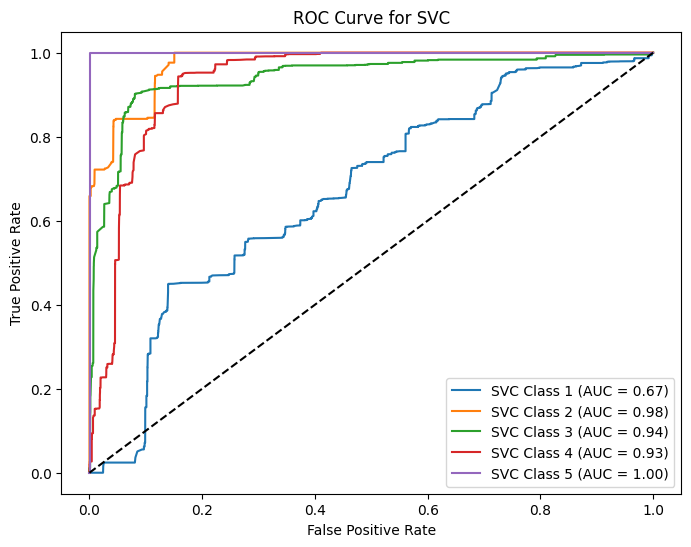

In [35]:
# Train SVC with OneVsRest strategy
svc = OneVsRestClassifier(SVC(kernel='linear', probability=True))
svc.fit(X_train_bin, y_train_bin)

y_pred = svc.predict(X_test_bin)
print("SVC Accuracy:", accuracy_score(y_test_bin, y_pred))
print(classification_report(y_test_bin, y_pred))

y_score = svc.decision_function(X_test_bin)

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"SVC Class {i+1} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVC")
plt.legend()
plt.show()

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

Logistic Regression Accuracy: 0.556704260651629
              precision    recall  f1-score   support

           0       0.62      0.58      0.60      4141
           1       0.89      0.67      0.77       381
           2       0.83      0.88      0.85      2612
           3       0.77      0.69      0.73      2426
           4       0.94      1.00      0.97        16

   micro avg       0.73      0.69      0.71      9576
   macro avg       0.81      0.76      0.78      9576
weighted avg       0.73      0.69      0.71      9576
 samples avg       0.81      0.69      0.65      9576



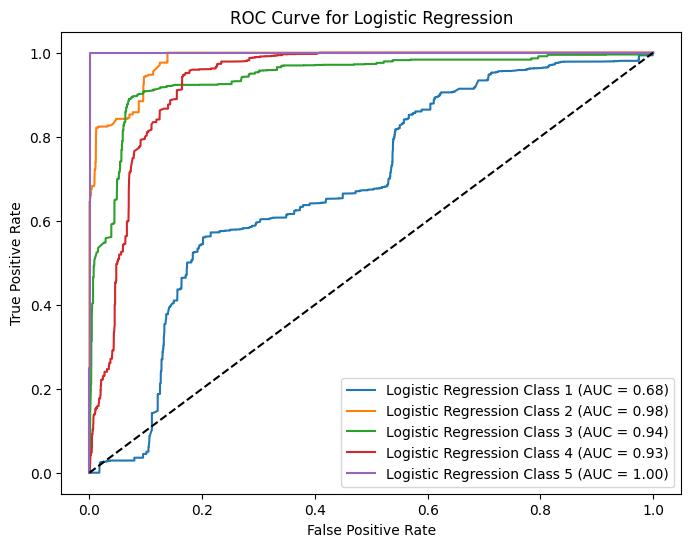

In [34]:
log_reg = OneVsRestClassifier(LogisticRegression(max_iter=1000))
log_reg.fit(X_train_bin, y_train_bin)

y_pred = log_reg.predict(X_test_bin)
print("Logistic Regression Accuracy:", accuracy_score(y_test_bin, y_pred))
print(classification_report(y_test_bin, y_pred, zero_division=1))

y_score = log_reg.decision_function(X_test_bin)

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Logistic Regression Class {i+1} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.show()

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

#### --> A sample code with a random generated dataset for test only whether the codebase works or not (initial):-

X_trainn.shape: (700, 20)
X_testt.shape: (300, 20)
y_trainn.shape: (700,)
y_testt.shape: (300,)
y_testt_bin.shape: (300, 3)
y_score: [[0.19 0.04 0.77]
 [0.8  0.03 0.17]
 [0.09 0.7  0.21]
 [0.62 0.38 0.  ]
 [0.03 0.89 0.08]]


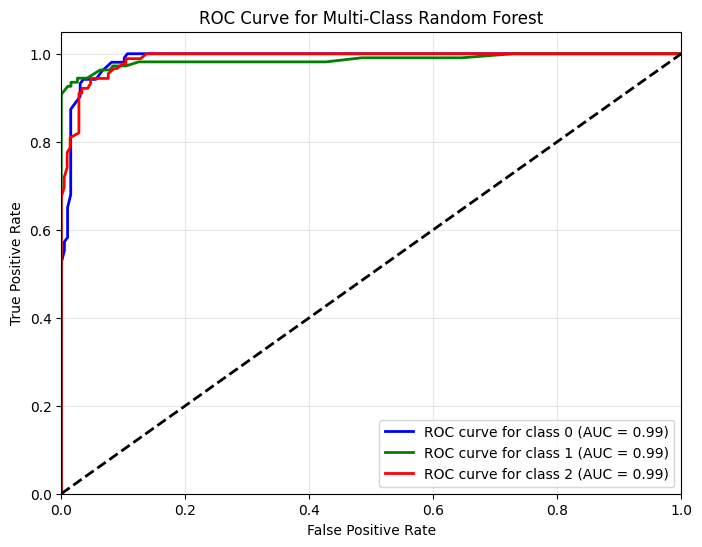

In [49]:

# 1. Create a synthetic multi-class dataset
XX, yy = make_classification(
    n_samples=1000,       # Number of samples
    n_features=20,        # Total number of features
    n_informative=10,     # Number of informative features
    n_redundant=5,        # Number of redundant features
    n_classes=3,          # Number of classes
    n_clusters_per_class=1,  # Number of clusters per class
    random_state=42
)
n_classess = 3  # Number of classes

# Split the dataset
X_trainn, X_testt, y_trainn, y_testt = train_test_split(XX, yy, test_size=0.3, random_state=42)

print(f"X_trainn.shape: {X_trainn.shape}")
print(f"X_testt.shape: {X_testt.shape}")
print(f"y_trainn.shape: {y_trainn.shape}")
print(f"y_testt.shape: {y_testt.shape}")

# Binarize the output (One-vs-Rest) after splitting
y_testt_bin = label_binarize(y_testt, classes=[0, 1, 2])

print(f"y_testt_bin.shape: {y_testt_bin.shape}")

# 2. Train the RandomForest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_trainn, y_trainn)  # Use 1D y_trainn for training

# 3. Get prediction probabilities for each class
y_score = rf.predict_proba(X_testt)
print(f"y_score: {y_score[:5]}")

# 4. Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classess):
    fpr[i], tpr[i], _ = roc_curve(y_testt_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 5. Plot the ROC curve
plt.figure(figsize=(8, 6))

colors = ['blue', 'green', 'red']
for i in range(n_classess):
    plt.plot(
        fpr[i],
        tpr[i],
        color=colors[i],
        lw=2,
        label=f"ROC curve for class {i} (AUC = {roc_auc[i]:.2f})",
    )

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line (random guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Random Forest")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

#### Now, train with our dataset:-

In [39]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

In [62]:
# Create a StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Define the parameter grid for Randomized Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator = rf,
    param_distributions = param_grid, 
    n_iter = 10,
    cv = skf,
    # scoring = 'accuracy',
    scoring="roc_auc_ovr",  # Optimize for ROC-AUC
    random_state = 42
)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 10, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='roc_auc_ovr')

In [63]:
# Print the best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

# Use the best model to make predictions on the testing set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred

Best parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20}
Best score: 0.9955630034243331


array([1., 3., 1., ..., 3., 1., 1.])

In [66]:
# 3. Get prediction probabilities for each class
y_score = best_model.predict_proba(X_test)
print(f"y_score: {y_score[:5]}")
print(f"y_score.shape: {y_score.shape}")

y_score: [[8.49928200e-01 1.53233221e-06 2.02521972e-04 1.49865970e-01
  1.77619893e-06]
 [1.50247719e-03 2.92918508e-04 9.98204604e-01 0.00000000e+00
  0.00000000e+00]
 [7.84780441e-01 1.53233221e-06 2.02521972e-04 2.15013729e-01
  1.77619893e-06]
 [9.32766386e-01 0.00000000e+00 6.72336137e-02 0.00000000e+00
  0.00000000e+00]
 [9.97654448e-01 0.00000000e+00 2.20904325e-04 2.12464754e-03
  0.00000000e+00]]
y_score.shape: (9576, 5)


In [56]:
print(f"y_test_bin: {y_test_bin[:5]}")
print(f"y_test_bin.shape: {y_test_bin.shape}")

y_test_bin: [[1 0 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 1 0 0 0]]
y_test_bin.shape: (9576, 5)


In [57]:
n_classes

5

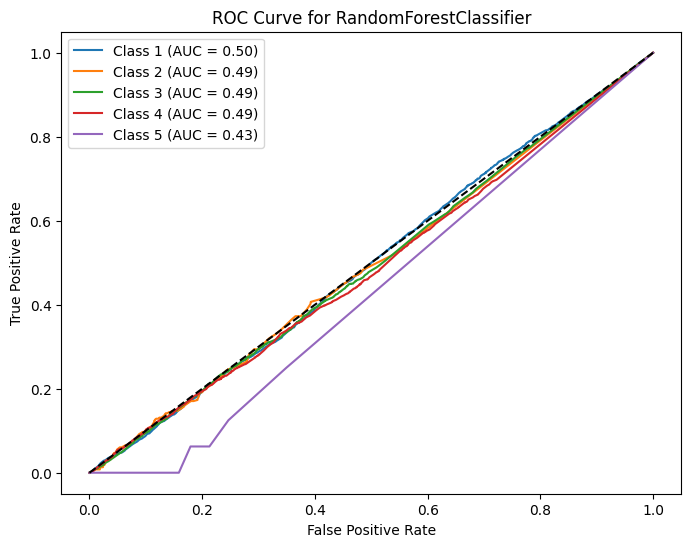

In [67]:
## Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    # print(f"fpr, tpr: {fpr}, {tpr}")
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i+1} (AUC = {roc_auc:.2f})")

# Plot diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for RandomForestClassifier")
plt.legend()
plt.show()

### A sample code of RF with label binarization only

X_trainn.shape: (700, 20)
X_testt.shape: (300, 20)
y_trainn.shape: (700,)
y_testt.shape: (300,)
y_testt_bin.shape: (300, 3)
y_score: [[0.19 0.04 0.77]
 [0.8  0.03 0.17]
 [0.09 0.7  0.21]
 [0.62 0.38 0.  ]
 [0.03 0.89 0.08]]


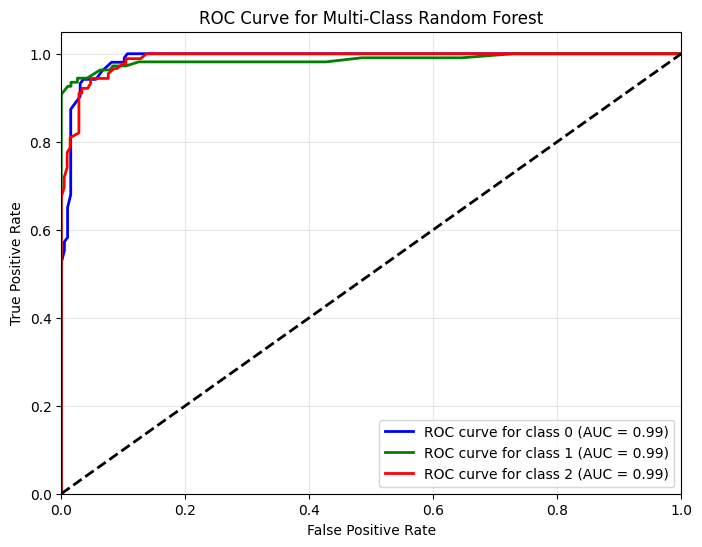

In [74]:
# 1. Create a synthetic multi-class dataset
XX, yy = make_classification(
    n_samples=1000,       # Number of samples
    n_features=20,        # Total number of features
    n_informative=10,     # Number of informative features
    n_redundant=5,        # Number of redundant features
    n_classes=3,          # Number of classes
    n_clusters_per_class=1,  # Number of clusters per class
    random_state=42
)
n_classess = 3  # Number of classes

# Split the dataset
X_trainn, X_testt, y_trainn, y_testt = train_test_split(XX, yy, test_size=0.3, random_state=42)

print(f"X_trainn.shape: {X_trainn.shape}")
print(f"X_testt.shape: {X_testt.shape}")
print(f"y_trainn.shape: {y_trainn.shape}")
print(f"y_testt.shape: {y_testt.shape}")

# Binarize the output (One-vs-Rest) after splitting
y_testt_bin = label_binarize(y_testt, classes=[0, 1, 2])

print(f"y_testt_bin.shape: {y_testt_bin.shape}")

# 2. Train the RandomForest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_trainn, y_trainn)  # Use 1D y_trainn for training

# 3. Get prediction probabilities for each class
y_score = rf.predict_proba(X_testt)
print(f"y_score: {y_score[:5]}")

# 4. Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classess):
    fpr[i], tpr[i], _ = roc_curve(y_testt_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 5. Plot the ROC curve
plt.figure(figsize=(8, 6))

colors = ['blue', 'green', 'red']
for i in range(n_classess):
    plt.plot(
        fpr[i],
        tpr[i],
        color=colors[i],
        lw=2,
        label=f"ROC curve for class {i} (AUC = {roc_auc[i]:.2f})",
    )

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line (random guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Random Forest")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

### Wrap RandomForestClassifier with OneVsRestClassifier (using StratifiedKFold & RandomizedSearchCV)

In [71]:
X, y = df_cleaned.iloc[:, 2:], df_cleaned['grid_code']

In [78]:
np.unique(y)

array([1., 2., 3., 4., 5.])

In [76]:
# Split data into training and testing sets
# X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.3, random_state=42, stratify=y_bin)

In [75]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [87]:
# Create a StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Wrap it in OneVsRestClassifier
ovr = OneVsRestClassifier(rf)

# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    "estimator__n_estimators": [50, 100, 200, 300],
    "estimator__max_depth": [None, 10, 20, 30],
    "estimator__min_samples_split": [2, 5, 10],
    "estimator__min_samples_leaf": [1, 2, 4],
}

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator = ovr, 
    param_distributions = param_dist, 
    n_iter = 10, 
    scoring = 'accuracy',
    # scoring = 'roc_auc_ovr'
    # cv = 3,
    cv = skf,
    random_state = 42
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'estimator__n_estimators': 300, 'estimator__min_samples_split': 10, 'estimator__min_samples_leaf': 1, 'estimator__max_depth': None}
Best Score: 0.9557784422800821


In [93]:
# Predict
y_pred = random_search.best_estimator_.predict(X_test)

# Calculate accuracy + other metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print("F1-score (micro):", f1_micro)
print("F1-score (macro):", f1_macro)
print("F1-score (weighted):", f1_weighted)

Accuracy: 0.9537385129490392
F1-score (micro): 0.9537385129490392
F1-score (macro): 0.9609987643200146
F1-score (weighted): 0.9537173707149829


In [85]:
# Binarize the output
y_test_bin = label_binarize(y_test, classes = np.unique(y))
n_classes = y_test_bin.shape[1]
print(y_test_bin.shape)
n_classes

(9576, 5)


5

In [91]:
# Predict probabilities
y_score = random_search.best_estimator_.predict_proba(X_test)
print(f"y_score: {y_score}")
print(f"y_score.shape: {y_score.shape}")

y_score: [[0.96631391 0.         0.         0.03368609 0.        ]
 [0.97754294 0.         0.         0.02245706 0.        ]
 [0.92594069 0.         0.07405931 0.         0.        ]
 ...
 [0.99226991 0.00773009 0.         0.         0.        ]
 [0.00767149 0.         0.99232851 0.         0.        ]
 [0.         0.04224486 0.95775514 0.         0.        ]]
y_score.shape: (9576, 5)


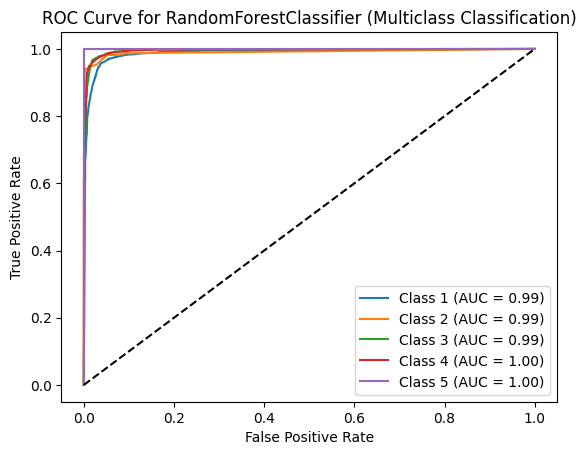

In [92]:
# Compute & plot ROC curve and AUC for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i+1} (AUC = {roc_auc:.2f})")

# Plot diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for RandomForestClassifier (Multiclass Classification)")
plt.legend()
plt.show()

### --> predict for a new datapoint (sample)

In [ ]:
# Example new data point
new_data_point = np.array([[5.0, 3.0, 1.0, 1.0, 2.0, 2.0, 5.0]])  # Replace with your actual data

# Assuming random_search is a fitted RandomizedSearchCV object
best_rf_model = random_search.best_estimator_  # Access best model

# Predict probabilities and class for RandomForestClassifier
class_probabilities = best_rf_model.predict_proba(new_data_point)
predicted_class = best_rf_model.predict(new_data_point)

print("Predicted Class Probabilities (RandomForest):", class_probabilities)
print("Predicted Class (RandomForest):", predicted_class)

# If using OneVsRestClassifier
class_probabilities_ovr = ovr_model.predict_proba(new_data_point)
predicted_class_ovr = np.argmax(class_probabilities_ovr, axis=1)

print("\nPredicted Class Probabilities (OneVsRest):", class_probabilities_ovr)
print("Predicted Class (OneVsRest):", predicted_class_ovr)